In [37]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
import random
import matplotlib as mpl

In [38]:
plt.rcParams["figure.figsize"] = (8,6)

# Predator-prey equations

In [39]:
def predator_prey_function(x, y, a, b, c, d):
    return (a*x - b*x*y, -c*y + d*x*y)

# Euler's method for solving ODE with two variables

In [40]:
def euler(iterations, initial, step, a=2/3, b=4/3, c=1, d=1):
    x_val = [initial[0]]
    y_val = [initial[1]]
    t_val = [0]
    for i in range(round(iterations/step)):
        delta = predator_prey_function(x_val[-1], y_val[-1], a, b, c, d)
        delta_x = step*delta[0]
        delta_y = step*delta[1]
        
        new_x = x_val[-1]+delta_x
        new_y = y_val[-1]+delta_y
        
        x_val.append(new_x)
        y_val.append(new_y)
        
        t_val.append(t_val[-1] + step)
    return t_val, x_val, y_val

# Phase portrait of predator-prey model made with Euler method

In [41]:
iterations = 50
initial = (0.9, 0.9)
step = 0.01

In [42]:
time_e, prey_e, predator_e = euler(iterations, initial, step)

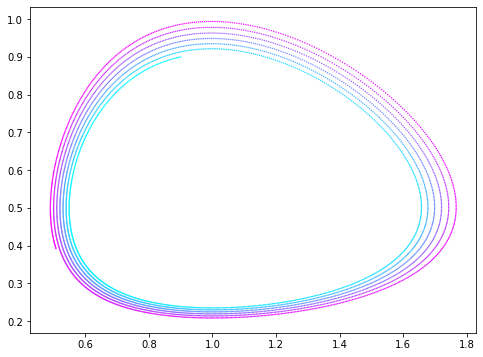

In [43]:
fig = plt.figure()
ax = fig.add_subplot(111)
colormap = plt.get_cmap('cool')
norm = mpl.colors.Normalize(0.0, time_e[-1])
ax.scatter(prey_e, predator_e, c=time_e, s=2, cmap=colormap, norm=norm, linewidths=0)

# Numerical integration of predator-pres equations made with Euler method

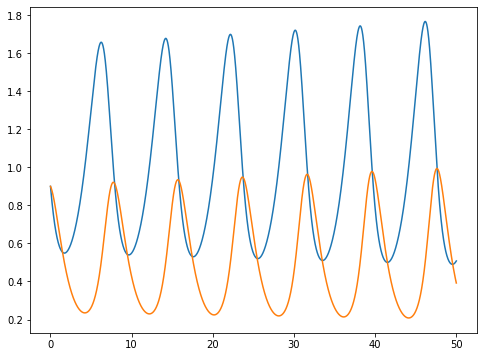

In [44]:
plt.plot(time_e, prey_e)
plt.plot(time_e, predator_e)

# Runge-Kutta method for solving ODE with two variables

In [45]:
def runge_kutta(iterations, initial, step, a=2/3, b=4/3, c=1, d=1):
    x_val = [initial[0]]
    y_val = [initial[1]]
    t_val = [0]
    for i in range(round(iterations/step)):
        x1, y1 = predator_prey_function(x_val[-1], y_val[-1], a, b, c, d)
        x2, y2 = predator_prey_function(x_val[-1]+step*x1/2, y_val[-1]+step*y1/2, a, b, c, d)
        x3, y3 = predator_prey_function(x_val[-1]+step*x2/2, y_val[-1]+step*y2/2, a, b, c, d)
        x4, y4 = predator_prey_function(x_val[-1]+step*x3, y_val[-1]+step*y3, a, b, c, d)
        
        x_val.append(x_val[-1]+step*(x1+2*x2+2*x3+x4)/6)
        y_val.append(y_val[-1]+step*(y1+2*y2+2*y3+y4)/6)
        t_val.append(t_val[-1] + step)
    return t_val, x_val, y_val

In [46]:
time_rk, prey_rk, predator_rk = runge_kutta(iterations, initial, step)
time_rk1, prey_rk1, predator_rk1 = runge_kutta(iterations, (1.2, 1.2), step)

# Phase portrait of predator-prey model made with Runge-Kutta method

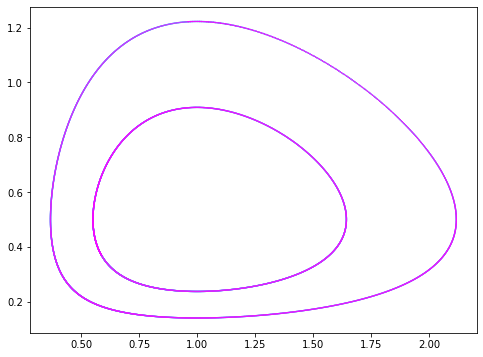

In [48]:
fig = plt.figure()
ax = fig.add_subplot(111)
colormap = plt.get_cmap('cool')
norm = mpl.colors.Normalize(0.0, time_rk[-1])
ax.scatter(prey_rk, predator_rk, c=time_rk, s=2, cmap=colormap, norm=norm, linewidths=0)
norm = mpl.colors.Normalize(0.0, time_rk1[-1])
ax.scatter(prey_rk1, predator_rk1, c=time_rk1, s=2, cmap=colormap, norm=norm, linewidths=0)

# Numerical integration of predator-pres equations made with Runge-Kutta method

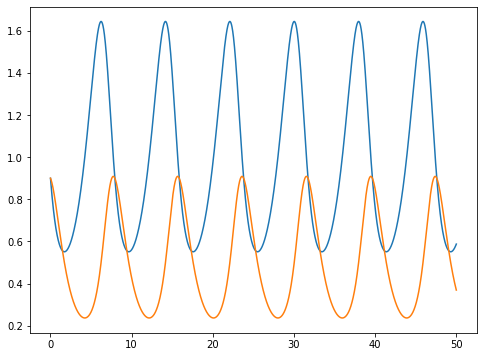

In [49]:
plt.plot(time_rk, prey_rk)
plt.plot(time_rk, predator_rk)

# Comparison of Euler and Runge-Kutta methods

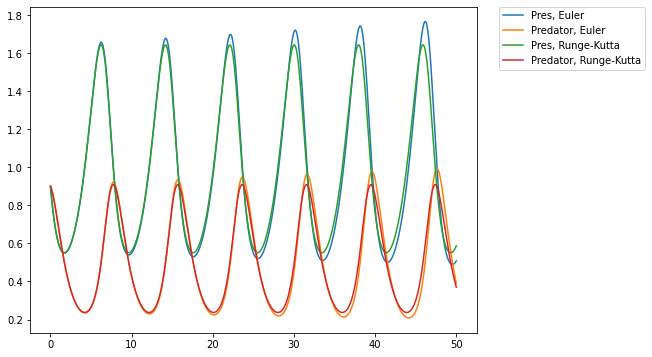

In [53]:
line1, = plt.plot(time_e, prey_e, label = 'Pres, Euler')
line2, = plt.plot(time_e, predator_e, label = 'Predator, Euler')
line3, = plt.plot(time_rk, prey_rk, label = 'Pres, Runge-Kutta')
line4, = plt.plot(time_rk, predator_rk, label = 'Predator, Runge-Kutta')
plt.legend(handles=[line1, line2, line3, line4])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

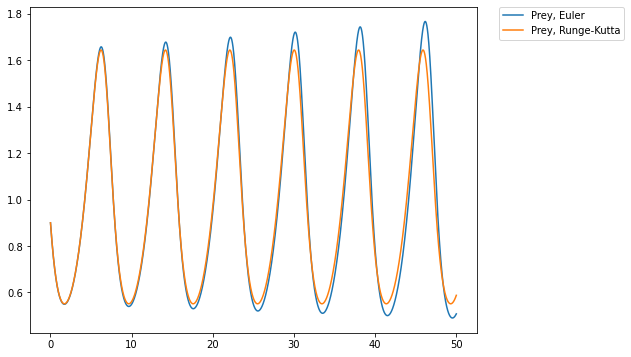

In [54]:
line1, = plt.plot(time_e, prey_e, label = 'Prey, Euler')
line3, = plt.plot(time_rk, prey_rk, label = 'Prey, Runge-Kutta')
plt.legend(handles=[line1, line3])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

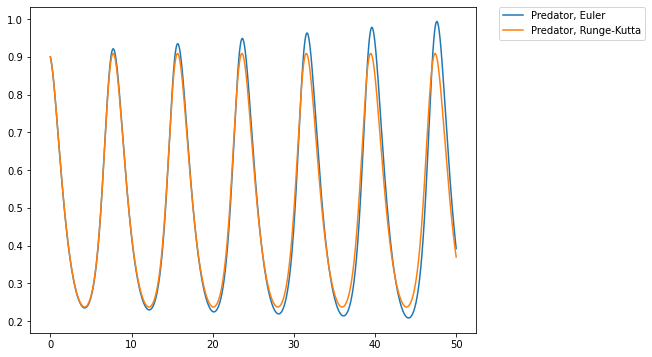

In [55]:
line2, = plt.plot(time_e, predator_e, label = 'Predator, Euler')
line4, = plt.plot(time_rk, predator_rk, label = 'Predator, Runge-Kutta')
plt.legend(handles=[line2, line4])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)